## Author: Chobi Rani Sahu

## Customer Segmentation

In this project, our main objective is to divide a customer base into distinct groups or segments based on their similarities in certain features or attributes using a unsupervised machine learning model. Here, we do not have labelled dataset hence unsupervised machine learning will be used. We will be using KMeans clustering. The steps followed to complete the task are:

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### 2. Importing Data

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('D:/Downloads/Projects/Mall_Customers.csv')
print("Data imported successfully")

Data imported successfully


In [3]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3. Exploring the Data

In [4]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [5]:
#Describing the data
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Renaming column names
customer_data.rename(columns = {'Annual Income (k$)': 'Annual_Income'}, inplace  = True)
customer_data.rename(columns = {'Spending Score (1-100)': 'Spending_Score'}, inplace  = True)

In [9]:
# Checking the column names
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

### 4. Data Visualisation

Correlation:
1. Positive Correlation
2. Negative Correlation

In [10]:
correlation = customer_data.corr()

<AxesSubplot:>

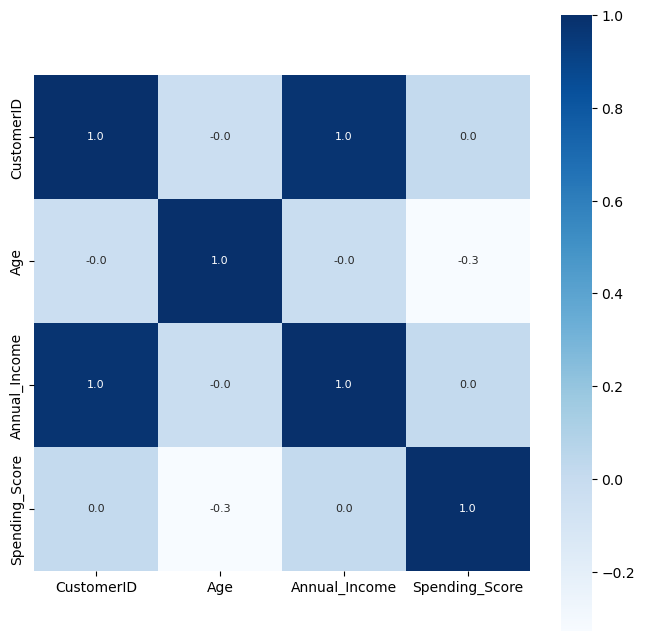

In [11]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
# correlation values of GLD
print(correlation['Spending_Score'])

CustomerID        0.013835
Age              -0.327227
Annual_Income     0.009903
Spending_Score    1.000000
Name: Spending_Score, dtype: float64


<AxesSubplot:xlabel='Annual_Income'>

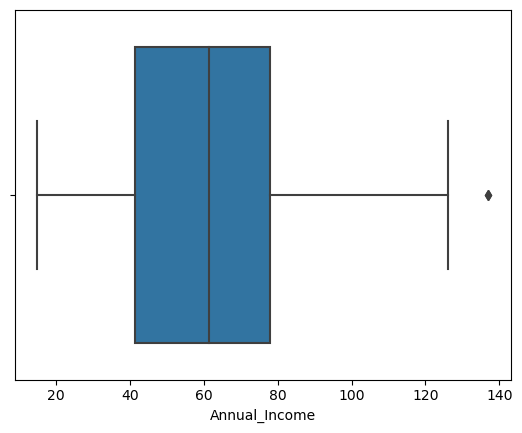

In [13]:
#Checking outliers by plotting boxplot
sns.boxplot(x=customer_data.Annual_Income)

<AxesSubplot:xlabel='Spending_Score'>

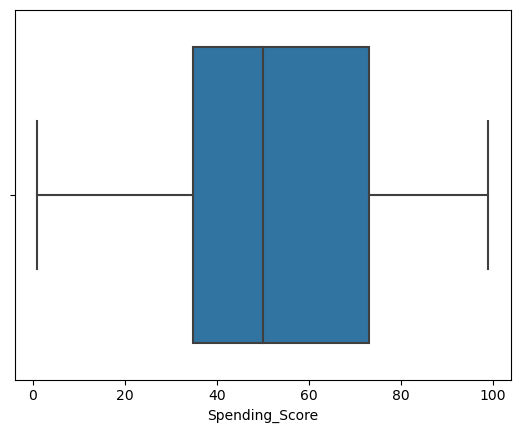

In [14]:
#Checking outliers by plotting boxplot
sns.boxplot(x=customer_data.Spending_Score)

There are no major outlier in 'Spending_Score' column but there are some outliers in 'Annual_Income' column.

Old Shape:  (200, 5)
New Shape:  (198, 5)


<AxesSubplot:xlabel='Annual_Income'>

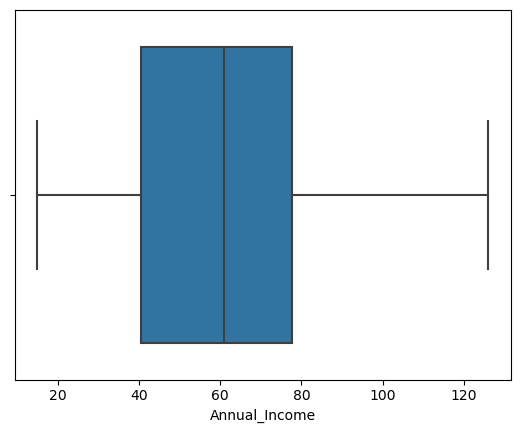

In [15]:
#Removing the outliers from 
# IQR
Q1 = np.percentile(customer_data['Annual_Income'], 25, interpolation = 'midpoint')
Q3 = np.percentile(customer_data['Annual_Income'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", customer_data.shape)
  
# Upper bound
upper = np.where(customer_data['Annual_Income'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(customer_data['Annual_Income'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
customer_data.drop(upper[0], inplace = True)
customer_data.drop(lower[0], inplace = True)
  
print("New Shape: ", customer_data.shape)
  
sns.boxplot(x=customer_data.Annual_Income)

### 4. Preparing the data

In [16]:
# Choosing the Annual Income Column & Spending Score column
X = customer_data.iloc[:,[3,4]].values

In [17]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### 5. Finding the optimum number of clusters for K Means classification

WCSS  ->  Within Clusters Sum of Squares

In [18]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


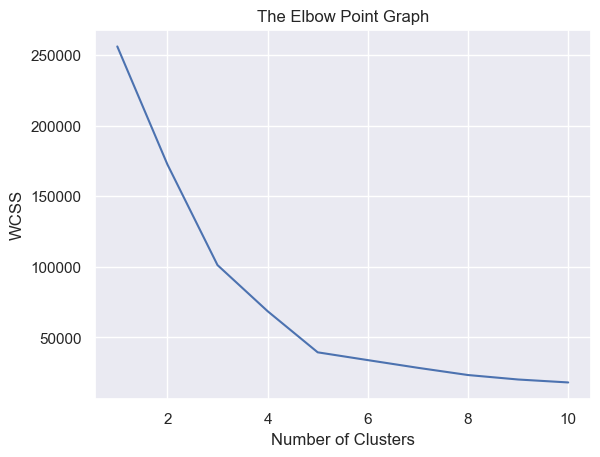

In [19]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We can easily find the optimum clusters using 'The elbow method. The optimum number of clusters is where the elbow occurs i.e. when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

**From the above graph, the optimum number of cluster for this task will be 5.**

### 6. Training the K-Means Clustering Model

In [20]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters -  0, 1, 2, 3, 4

### 7. Visualising the clusters

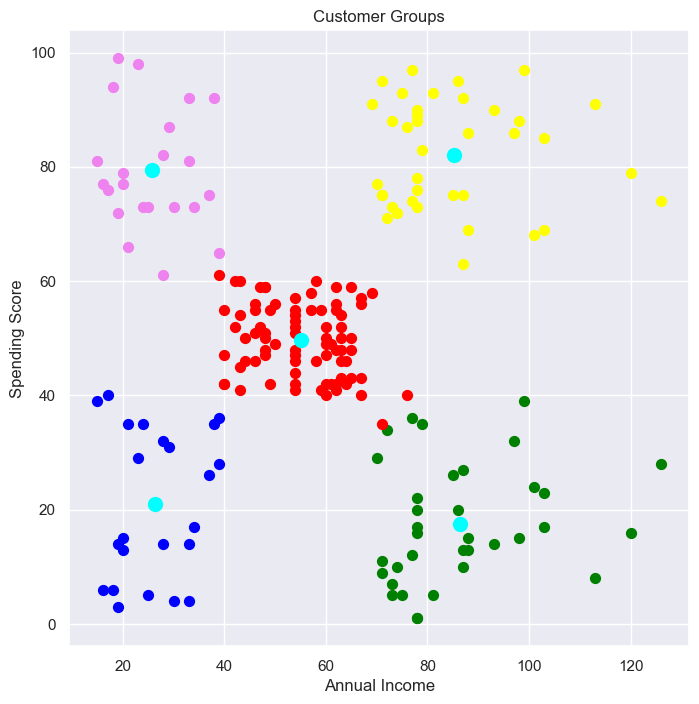

In [21]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()